In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [77]:
cc = pd.read_csv('data/countries_capitals.csv')
cc = cc.apply(lambda x : x.astype(str).str.lower(), axis = 0)
cc.head()

,country,capital,type
0,abkhazia,sukhumi,countrycapital
1,afghanistan,kabul,countrycapital
2,akrotiri and dhekelia,episkopi cantonment,countrycapital
3,albania,tirana,countrycapital
4,algeria,algiers,countrycapital


In [178]:
original = pickle.load(open('saved/toy_all_embeddings.pkl', 'rb'))
final = pickle.load(open('saved/final_layer_embeddings.pkl', 'rb'))

In [179]:
def similarity(embeddings):
    avg = []
    for index, row in cc.iterrows():
        try:
            e1 = embeddings[row['capital']]
            e2 = embeddings[row['country']]
            sim = 1 - spatial.distance.cosine(e1, e2)
            avg.append(sim)
        except:
            continue
    print(np.mean(avg))

In [180]:
print(similarity(original), similarity(final))

0.5800239341929946
0.8254426983094985
None None


In [181]:
def analogy(embeddings):
    sim = []
    for index1, row1 in cc.iterrows():
        try:
            cap1 = np.array(embeddings[row1['capital']])
            con1 = np.array(embeddings[row1['country']])
            for index2, row2 in cc.iterrows():
                if row1['country'] == row2['country']:
                    continue
                try:
                    cap2 = np.array(embeddings[row2['capital']])
                    con2 = np.array(embeddings[row2['country']])
                    cap2_pred = cap1 - con1 + con2
                    sim.append(1 - spatial.distance.cosine(cap2_pred, cap2))
                except:
                    continue
        except:
            continue
    print(np.mean(sim))

In [182]:
print(analogy(final))

0.7470503883704125
None


In [189]:
def question(embeddings):
    X = [embeddings[i] for i in embeddings]
    Y = [i for i in embeddings]
    countires = list(cc['country'])
    capitals = list(cc['capital'])
    correct = 0
    total = 0
    for country in Y:
        if country in countires:
            total += 1
            x = np.array(embeddings[country])
            sim_mat = {capital:(spatial.distance.cosine(x, embeddings[capital])) for capital in Y if capital in capitals}
            answer = max(sim_mat, key=sim_mat.get)
            if answer == list(cc[cc.country == country]['capital'])[0]:
                correct += 1
    print(correct/total)

In [191]:
print(question(original))

0.0
None


In [190]:
print(question(final))

0.005681818181818182
None


In [114]:
def tsne_plot(embeddings):
    X = [embeddings[i] for i in embeddings]
    Y = [i for i in embeddings]
    X_embedded = TSNE(n_components=2, perplexity = 30, n_iter = 1000, metric = 'cosine').fit_transform(X)
    fig, ax = plt.subplots(figsize = (32, 20))
    ax.scatter(x = X_embedded[:,0], y = X_embedded[:,1])
    for i, txt in enumerate(Y):
        ax.annotate(txt, (X_embedded[i,0], X_embedded[i,1]))
    plt.show()

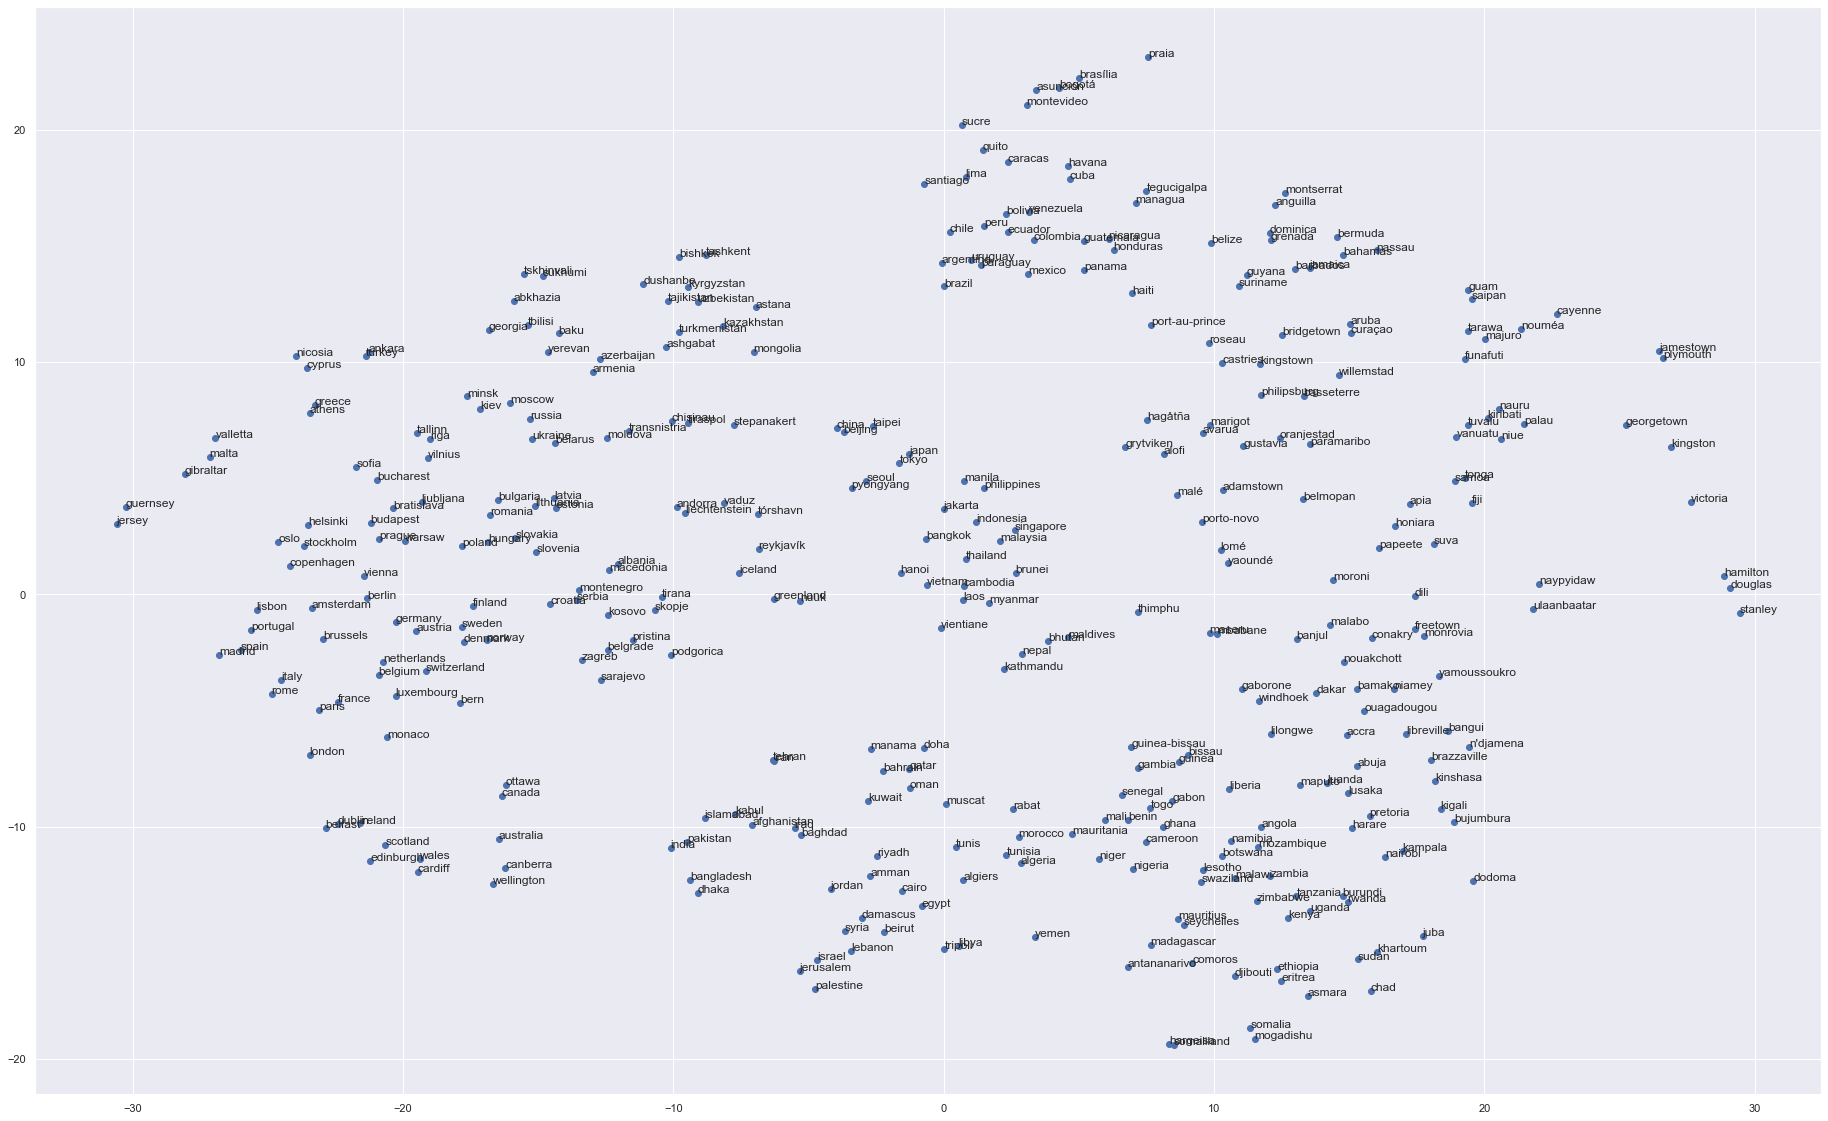

In [45]:
tsne_plot(original)

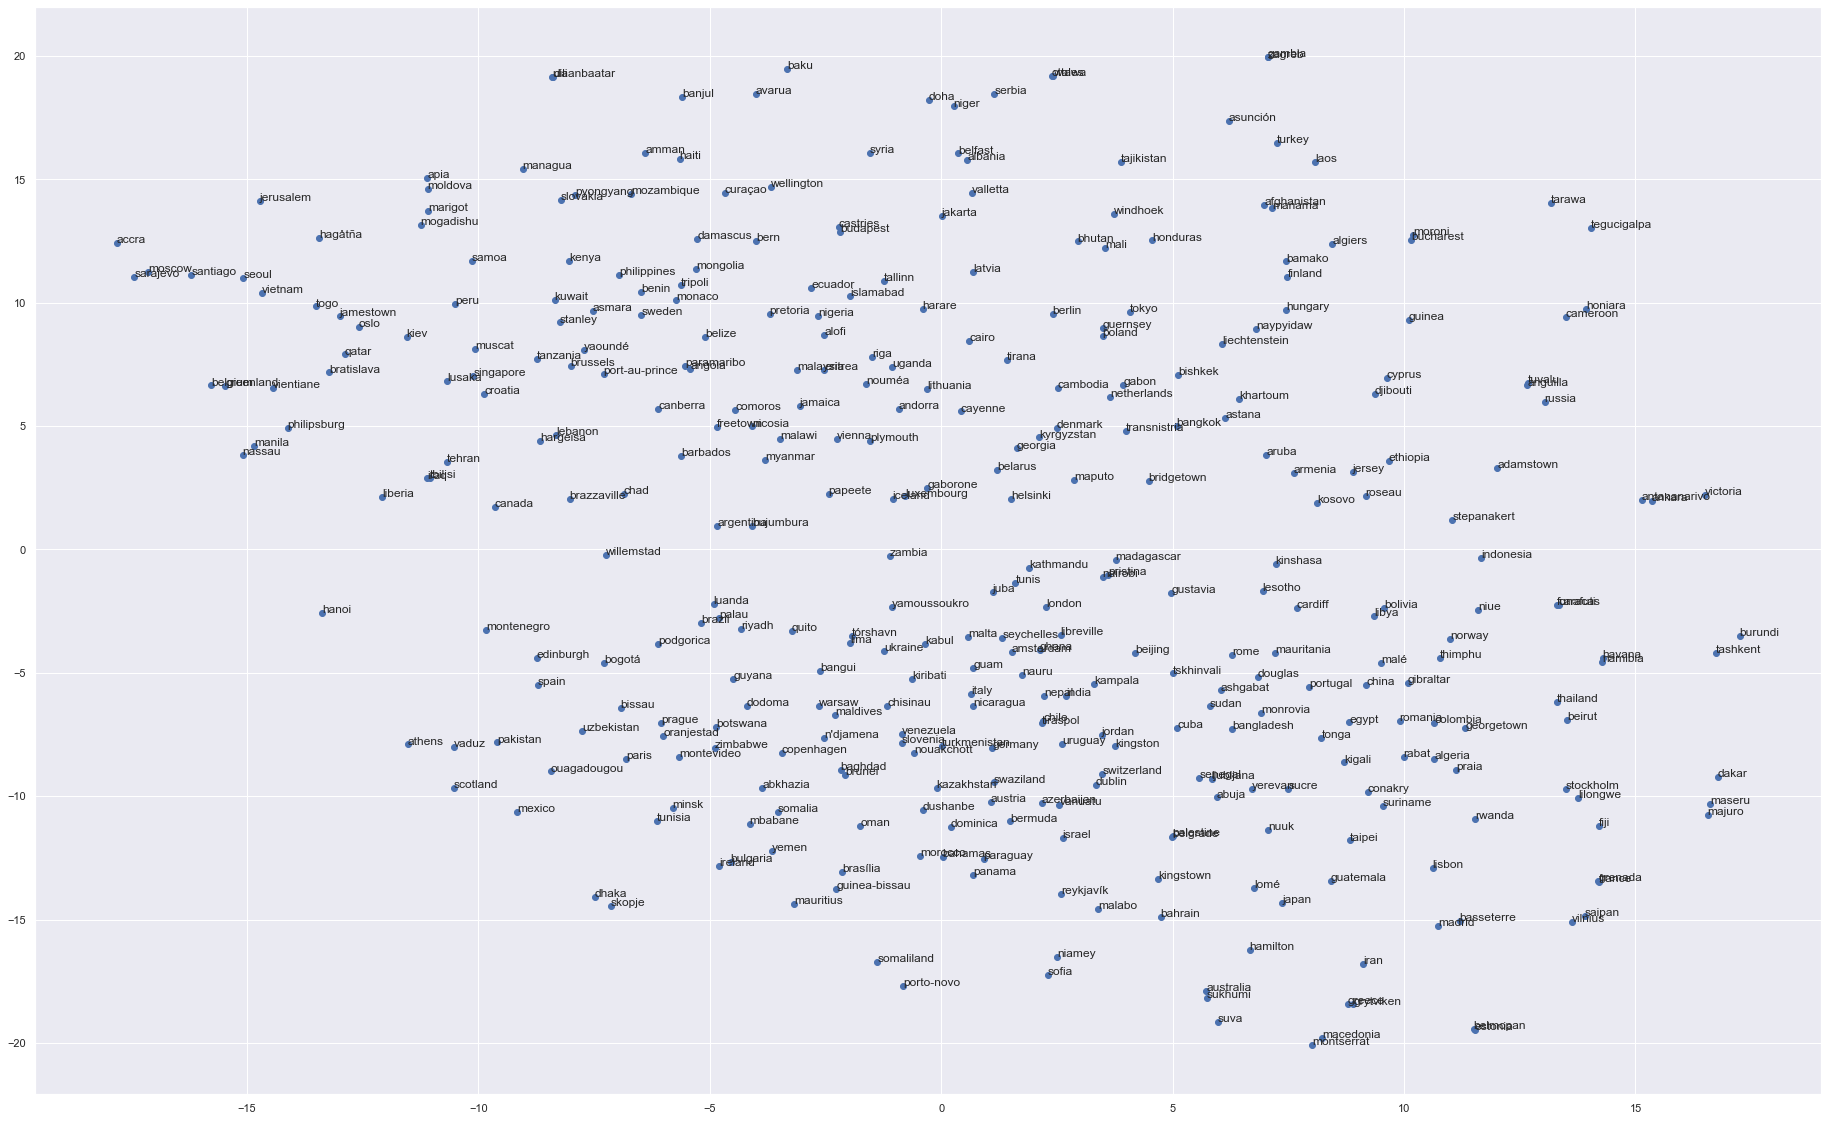

In [156]:
tsne_plot(final)

In [56]:
def similarity_print(embeddings):
    new = {'capital':[], 'country':[], 'sim':[]}
    for index, row in cc.iterrows():
        try:
            e1 = embeddings[row['capital']]
            e2 = embeddings[row['country']]
            sim = 1 - spatial.distance.cosine(e1, e2)
            new['capital'].append(row['capital'])
            new['country'].append(row['country'])
            new['sim'].append(sim)
        except:
            continue
    return pd.DataFrame(new)

In [188]:
np.sum(np.abs(final['afghanistan'] - final['cairo']))

26.642935

In [187]:
np.sum(np.abs(np.array(original['afghanistan']) - np.array(original['berlin'])))

119.7238107